# Análise e exploração de dados sobre um e-commerce
Análise sobre dados de marketing de um site de e-commerce. É necessário ser feita uma análise e exploração para entender os problemas e entregar soluções *Data-Driven*.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn

In [103]:
base = pd.read_csv('./marketing_data.csv')
pd.set_option('display.max_columns', None)
base.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


Agora vamos começar a analisar e garimpar os dados para uma limpeza e tratamento.

In [4]:
print('Shape: ', base.shape)
print('Colunas: ', [col for col in base.columns])

Shape:  (2240, 28)
Colunas:  ['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']


In [5]:
base.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Valores nulos
base.isnull().sum() # == base.isna().sum() # true

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Antes de continuar, trocaremos o nome ' Income ' para 'income', pois está com espaços indesejados:

In [7]:
base.rename(mapper={' Income ': 'income'}, inplace=True, axis=1)

Veremos se nos valores categóricos terão dados unitários.

In [8]:
categorical = base.dtypes == 'object'
categories = list(categorical[categorical].index)
categories

['Education', 'Marital_Status', 'income', 'Dt_Customer', 'Country']

In [9]:
for cat in categories:
    print(f'Valores unitários em {cat}: ', base[cat].unique())

Valores unitários em Education:  ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Valores unitários em Marital_Status:  ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
Valores unitários em income:  ['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']
Valores unitários em Dt_Customer:  ['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11/15/13'
 '9/20/13' '9/5/13' '8/31/13' '7/30/13' '7/27/13' '6/22/13' '1/5/13'
 '11/21/12' '1

Podemos refletir que nem todos os valores categóricos são realmente categóricos. Teremos que arrumar isso antes de prosseguir.

Valores não categóricos que precisam ser transformados: \['income', 'Dt_Customer'\]

Vamos primeiro transformar os dados de Dt_Customer, sabemos que são Datas, podemos utilizar o [datetime.parser]:

In [104]:
base['Dt_Customer'].tail()

2235      3/7/13
2236     1/22/13
2237     12/3/12
2238    11/29/12
2239      9/1/12
Name: Dt_Customer, dtype: object

In [105]:
from datetime import datetime

to_date = lambda date: datetime.strptime(date, '%m/%d/%y')

def adding_zero(date: str):
    split = date.split('/')
    split[0] = split[0].zfill(2) + '/'
    split[1] = split[1].zfill(2) + '/'
    split[2] = split[2].zfill(2)
    return ''.join(split)

temp_timer_base = base['Dt_Customer'].map(adding_zero)
temp_timer_base = temp_timer_base.map(to_date)
base['Dt_Customer'] = temp_timer_base

In [106]:
base['Dt_Customer'].head()

0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-05-11
4   2014-04-08
Name: Dt_Customer, dtype: datetime64[ns]

Daremos uma olhada amistosa nos dados a partir das datas dos Costumers

In [115]:
# Vamos fazer uma cópia e indexar as rows a partir da data.
date_index = base.copy()
date_index.index = date_index['Dt_Customer']

# Aqui vemos os valores totais por ano e mês e depois só ano.
date_index.groupby([date_index.index.year, date_index.index.month]).count() #.agg({'count'})
date_index.groupby([date_index.index.year]).count() #.agg({'count'})

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
Dt_Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012,494,494,494,494,490,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494
2013,1189,1189,1189,1189,1173,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189
2014,557,557,557,557,553,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557


Aproveitando que já estámos aqui, iremos plotar os dados de Costumers/Year, para saber a quantidade de clientes por ano.

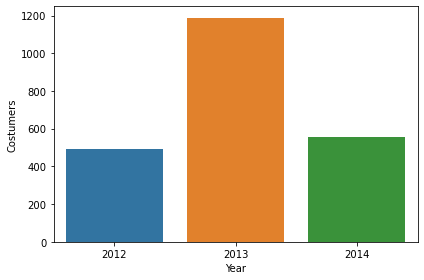

In [121]:
only_year = date_index.groupby(date_index.index.year).count()
x = only_year.index
y = only_year['ID']
srn.barplot(x, y)
plt.xlabel('Year')
plt.ylabel('Costumers')

Temos que a maioria dos costumers entraram em 2013. Vamos fazer um histograma de meses, para entender melhor

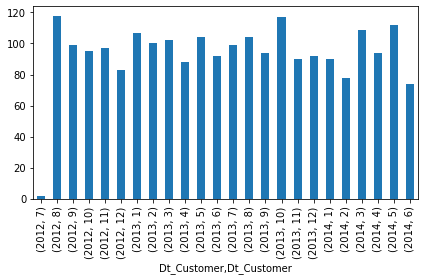

In [146]:
month_year = date_index.groupby([date_index.index.year, date_index.index.month]).count()['Dt_Customer']
# plt.hist(month_year)
month_year.plot.bar()
plt.tight_layout()

### Agora sim podemos focar nos reais dados categóricos.

In [10]:
# YOLO não é bem um estado civil...
base.loc[base.Marital_Status == 'YOLO']

,ID,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
103,492,1973,PhD,YOLO,"$48,432.00",0,1,10/18/12,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,0,CA
104,11133,1973,PhD,YOLO,"$48,432.00",0,1,10/18/12,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,1,0,IND


Vemos que os valores nulos só aparecem em Income.

Então, mostramos os valores nulos de 'income', veremos a melhor forma de tratar esse valores faltantes.

In [11]:
income_null_indexes = base.income.isnull()
base[income_null_indexes]

,ID,Year_Birth,Education,Marital_Status,income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,5,65,26,20,14,2,4,2,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,42,48,94,66,96,7,4,10,4,3,0,0,0,0,0,0,0,AUS
